###  GDP의 상위10개국과 하위10개국의 유아 사망률 비교

1. 모듈 로딩
2. 데이터 준비
3. DF로 저장
4. 전처리 
- 먼저 컬럼 추출
- gdp로 순서를 나열해서 상위10개국 하위10개국선정
  - gdp에 NaN이 존재하는 경우 해당 국가 삭제
   >> 선진국, 개발도산국의 데이터를 보기위해서
- 각각의 컬럼들을 corr로 비교
5. 시각화
- 시간에 따른 데이터

In [50]:
# 1. 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# 2. 데이터 준비
f2_name = r'C:\Users\KDP-23\Desktop\KDT\pandas\project\Life Expectancy Data (1).csv'

In [52]:
# 3. csv >>> 데이터 프레임으로 저장
df= pd.read_csv(f2_name)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [53]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,3.173169e+07,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2.883167e+06,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,2.843310e+05,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2.729431e+06,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,2.661679e+07,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2.589345e+06,19.2,19.3,0.405,8.1


#### 유아 사망률과 관련있다 판단한 칼럼 정보: 
    >>> 예방접종 및 보건관련 칼럼과 GDP과 관련 칼럼  
- Year : 데이터 기록 연도  
- Life expectancy : 출생시 평균 기대수명  
- Infant deaths : 인구 1000명당 영아 사망 수  
- Percentage expenditure : GDP 대비 보건 지출 비율  
- Hepatitis B : 1세 어린이 중 B형 간염 예방접종률 (%)  
- Under-five deaths : 인구 1000명당 5세 미만 사망 수  
- Polio : 1세 어린이 중 소아마비 예방접종률 (%)  
- Total expenditure : 정부의 총 예산 중 보건 지출 비율 (%)  
- HIV/AIDS : 0-4세 사이 HIV/AIDS 사망률 (1000명당 생명)  
- GDP : 국내 총생산(GDP) per capita  
- Population : 국가 인구  
- Schooling : 교육 연수  

In [54]:
# 컬럼 추출 >>> DF으로 따로 저장
df.columns = df.columns.str.strip()
columns = [
    'Country', 'Year', 'Life expectancy', 'infant deaths', 'percentage expenditure',
    'Hepatitis B', 'under-five deaths', 'Polio', 'Total expenditure', 'HIV/AIDS',
    'GDP', 'Population', 'Schooling']
df2 = df[columns]

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2938 non-null   object 
 1   Year                    2938 non-null   int64  
 2   Life expectancy         2928 non-null   float64
 3   infant deaths           2938 non-null   int64  
 4   percentage expenditure  2938 non-null   float64
 5   Hepatitis B             2385 non-null   float64
 6   under-five deaths       2938 non-null   int64  
 7   Polio                   2919 non-null   float64
 8   Total expenditure       2712 non-null   float64
 9   HIV/AIDS                2938 non-null   float64
 10  GDP                     2490 non-null   float64
 11  Population              2286 non-null   float64
 12  Schooling               2775 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage: 298.5+ KB


In [56]:
# 4. 전처리
# GDP에 NaN 값이 존재 >> NaN값이 있는 국가는 drop으로 빼고 나머지 국가로 GDP상위 10개국, 하위 10개국 차출
# Country로 set_index
df2.set_index('Country', inplace=True)

# ''GDP' 값에 NaN이 있는 'Country'를 식별하고 해당 국가의 모든 행 제거
nan_gdp = df2[df2['GDP'].isna()].index.unique()
df2 = df2.drop(nan_gdp)

# 나머지 국가의 평균 GDP 계산
gdp = df2.groupby('Country')['GDP'].mean()

# 평균 GDP를 내림차순으로 정렬
gdp_sort = gdp.sort_values(ascending=False)
gdp_sort

Country
Switzerland                 57362.874601
Luxembourg                  53257.012741
Qatar                       40748.444104
Netherlands                 34964.719797
Australia                   34637.565047
Ireland                     33835.272005
Austria                     33827.476309
Denmark                     33067.407916
Singapore                   32790.105907
Kuwait                      31914.378339
Iceland                     30159.502907
Canada                      29382.907523
Sweden                      29334.990639
Norway                      27434.946928
France                      26465.551381
Finland                     25268.649758
Japan                       24892.544784
Germany                     24337.749100
United Arab Emirates        22110.366986
Italy                       21234.782371
Brunei Darussalam           19744.808102
Israel                      18860.476016
Spain                       17093.459737
Belgium                     16915.306000
Greece  

In [57]:
# 상위 10개 및 하위 10개 국가 선택
top10 = gdp_sort.head(10).index.tolist()
bottom10 = gdp_sort.tail(11).index.tolist()

# 선택 후 확인 > 나루라는 나라가 2013년 데이터 밖에 없어 > tail을 11로 수정 후 나루 삭제
bottom10.remove('Nauru')
top10, bottom10

(['Switzerland',
  'Luxembourg',
  'Qatar',
  'Netherlands',
  'Australia',
  'Ireland',
  'Austria',
  'Denmark',
  'Singapore',
  'Kuwait'],
 ['Madagascar',
  'Rwanda',
  'Guinea',
  'Senegal',
  'Sierra Leone',
  'Ethiopia',
  'Niger',
  'Liberia',
  'Malawi',
  'Burundi'])

상위 10개국 >>  
'스위스', '룩셈부르크', '카타르', '네덜란드', '호주',   
'아일랜드','오스트리아', '덴마크','싱가포르', '쿠웨이트'

하위 10개국 >>  
'마다가스카르', '르완다', '기니', '세네갈', '시에라리온'   
'에티오피아', '니제르', '리베리아', '말라위', '부룬디'

In [58]:
# 상위 10개 및 하위 10개 국가의 데이터프레임 생성
top10_df = df2.loc[top10]
bottom10_df = df2.loc[bottom10]

# 결과 데이터프레임 출력
top10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Switzerland to Kuwait
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             106 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       150 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              112 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [59]:
bottom10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Madagascar to Burundi
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             108 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       150 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              160 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [60]:
# 결측치를 나라별로 컬럼을 평균을 내어 NaN을 채운다
# 함수 기능 : 각 나라별로 NaN 값을 해당 나라의 평균 값으로 채우는 함수
# 함수 이름 : fillna_mean()
# 매개 변수 : 원하는 df
def fillna_mean(df):
    df_filled = df.groupby(level=0,group_keys=False).apply(lambda group: group.fillna(group.mean()))
    df_filled = df_filled.fillna(df_filled.mean())
    return df_filled
# 1. df.groupby(level=0)는 데이터프레임을 인덱스 레벨 0(즉, 'Country')를 기준으로 그룹화, 나라별로 데이터를 그룹화
# 2. 각 그룹(나라)에 대해 fillna(group.mean())를 적용합니다. 나라의 평균 값으로 NaN 값을 채우는 작업을 수행합니다.
# 마지막으로 전체 데이터프레임의 평균 값을 사용하여 남아 있는 NaN 값을 채웁니다.

In [61]:
# 함수 적용
top10_df_filled = fillna_mean(top10_df)
bottom10_df_filled = fillna_mean(bottom10_df)

# 결측치 확인
top10_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Switzerland to Kuwait
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             160 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       160 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              160 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [62]:
bottom10_df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Madagascar to Burundi
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    160 non-null    int64  
 1   Life expectancy         160 non-null    float64
 2   infant deaths           160 non-null    int64  
 3   percentage expenditure  160 non-null    float64
 4   Hepatitis B             160 non-null    float64
 5   under-five deaths       160 non-null    int64  
 6   Polio                   160 non-null    float64
 7   Total expenditure       160 non-null    float64
 8   HIV/AIDS                160 non-null    float64
 9   GDP                     160 non-null    float64
 10  Population              160 non-null    float64
 11  Schooling               160 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 16.2+ KB


In [63]:
top10_df_filled
# 행 전체 보기
pd.options.display.max_rows = None
top10_df_filled

,Year,Life expectancy,infant deaths,percentage expenditure,Hepatitis B,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,Population,Schooling
Country,,,,,,,,,,,,
Switzerland,2015,83.4,0,0.000000,86.374479,0,97.0,6.087333,0.1,8989.84240,8.282396e+06,16.0
Switzerland,2014,83.2,0,19479.911610,86.374479,0,96.0,11.660000,0.1,85814.58857,8.188649e+06,15.9
Switzerland,2013,83.0,0,19099.045060,86.374479,0,96.0,11.710000,0.1,84658.88768,8.893460e+05,15.8
Switzerland,2012,82.7,0,18379.329740,86.374479,0,96.0,11.590000,0.1,83164.38795,7.996861e+06,15.7
Switzerland,2011,82.6,0,18822.867320,86.374479,0,96.0,11.210000,0.1,87998.44468,7.912398e+06,15.6
Switzerland,2010,82.3,0,2198.590865,86.374479,0,96.0,11.700000,0.1,74276.71842,7.824990e+05,15.4
Switzerland,2009,82.1,0,14714.825880,86.374479,0,96.0,11.000000,0.1,69672.47100,7.743831e+06,15.3
Switzerland,2008,82.0,0,2084.255535,86.374479,0,96.0,1.290000,0.1,72119.56870,7.647675e+06,15.3
Switzerland,2007,81.7,0,11892.334290,86.374479,0,94.0,1.210000,0.1,63223.46778,7.551117e+06,15.3


In [64]:
bottom10_df_filled
pd.options.display.max_rows = None
bottom10_df_filled

,Year,Life expectancy,infant deaths,percentage expenditure,Hepatitis B,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,Population,Schooling
Country,,,,,,,,,,,,
Madagascar,2015,65.5,28,0.000000,69.000000,38,71.0,4.710667,0.3,41.857595,2423488.0,10.3
Madagascar,2014,65.1,29,5.339066,73.000000,39,73.0,3.400000,0.3,452.463193,2358981.0,10.3
Madagascar,2013,64.7,29,79.508825,74.000000,40,73.0,4.150000,0.4,461.723722,22961146.0,10.3
Madagascar,2012,64.3,30,59.979145,7.000000,42,71.0,3.460000,0.4,443.961100,22346573.0,10.2
Madagascar,2011,63.8,31,78.799672,73.000000,43,73.0,4.240000,0.4,454.963464,21743949.0,10.2
Madagascar,2010,63.3,32,76.604422,7.000000,45,7.0,4.860000,0.5,412.739341,2115164.0,10.2
Madagascar,2009,62.8,33,71.166012,77.000000,47,76.0,4.700000,0.5,415.689323,2569121.0,9.7
Madagascar,2008,62.3,34,6.448763,77.000000,49,77.0,4.500000,0.5,47.733254,19996469.0,9.4
Madagascar,2007,61.9,35,55.430345,84.000000,51,83.0,4.980000,0.6,377.848293,19433523.0,9.1


In [65]:
top10_List = []
for country in top10:
    top10_List.append(top10_df_filled.loc[country])
top10_List

[             Year  Life expectancy  infant deaths  percentage expenditure  \
 Country                                                                     
 Switzerland  2015             83.4              0                0.000000   
 Switzerland  2014             83.2              0            19479.911610   
 Switzerland  2013             83.0              0            19099.045060   
 Switzerland  2012             82.7              0            18379.329740   
 Switzerland  2011             82.6              0            18822.867320   
 Switzerland  2010             82.3              0             2198.590865   
 Switzerland  2009             82.1              0            14714.825880   
 Switzerland  2008             82.0              0             2084.255535   
 Switzerland  2007             81.7              0            11892.334290   
 Switzerland  2006             81.5              0            10598.081870   
 Switzerland  2005             81.1              0            10

In [66]:
top10_df_filled.loc['Kuwait']

,Year,Life expectancy,infant deaths,percentage expenditure,Hepatitis B,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,Population,Schooling
Country,,,,,,,,,,,,
Kuwait,2015,74.7,0,0.000000,99.0,1,99.0,2.809333,0.1,28975.41800,4.982284e+06,13.3
Kuwait,2014,74.6,0,2480.896965,96.0,1,94.0,3.400000,0.1,42996.48120,4.982284e+06,13.0
Kuwait,2013,74.5,1,2792.677582,99.0,1,99.0,2.560000,0.1,48399.95810,4.982284e+06,13.1
Kuwait,2012,74.3,1,2957.973963,98.0,1,98.0,2.570000,0.1,51264.71340,4.982284e+06,13.2
Kuwait,2011,74.2,1,2785.097712,99.0,1,99.0,2.620000,0.1,48268.59120,4.982284e+06,13.4
Kuwait,2010,74.0,1,2009.575605,99.0,1,98.0,2.760000,0.1,38497.61696,4.982284e+06,13.5
Kuwait,2009,73.9,1,3001.628237,99.0,1,99.0,3.870000,0.1,37567.31210,4.982284e+06,13.6
Kuwait,2008,73.8,1,2078.392748,99.0,1,99.0,1.930000,0.1,55571.99860,4.982284e+06,13.8
Kuwait,2007,73.7,1,2555.303869,99.0,1,99.0,2.130000,0.1,45793.97614,4.982284e+06,13.9


### 5. 시각화
지금 뭐를 분석하고 어떤걸 시각화 할것인가??
1. x축을 year으로 하여 시간에 따른 영아 사망률을 그래프로
2. 영아 사망률과 상관계수 corr()을 통하여 연관된 데이터가 있는지
  
- Infant deaths(영아 사망률): 인구 1000명당 영아 사망 수 

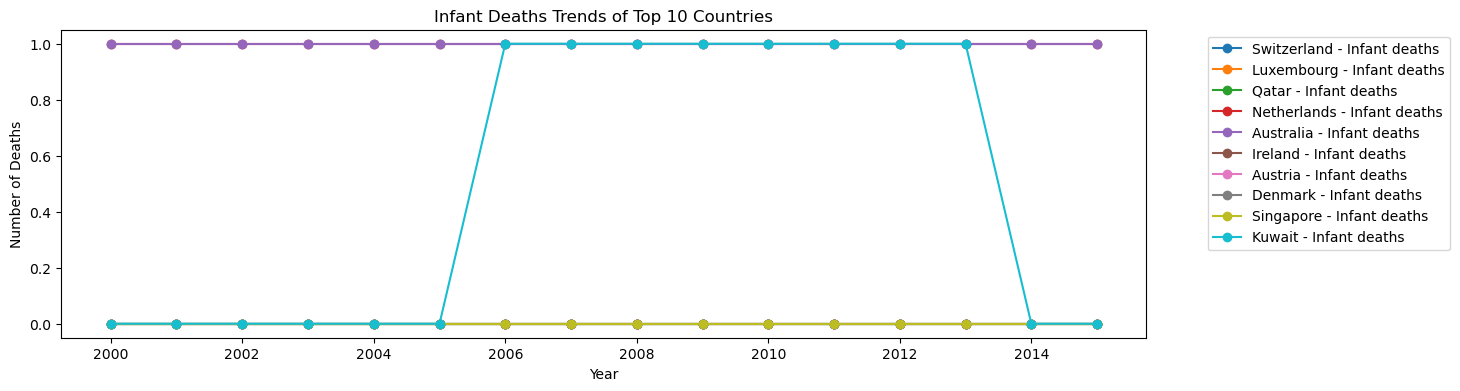

In [67]:
# 상위 10개국
fig = plt.figure(figsize=(14, 4))
fig.subplots()

top10_List = []
for country in top10:
    top10_List.append(top10_df_filled.loc[country])
top10_List

for i in range(len(top10)):
    plt.plot(top10_List[i]['Year'], top10_List[i]['infant deaths'], marker='o', label=f"{top10[i]} - Infant deaths")
    
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Infant Deaths Trends of Top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 상위 10개국 >> 스위스', '룩센부르크', '카타르', '네덜란드', '호주', '아일랜드','오스트리아', '덴마크', '싱가포르', '쿠웨이트'  

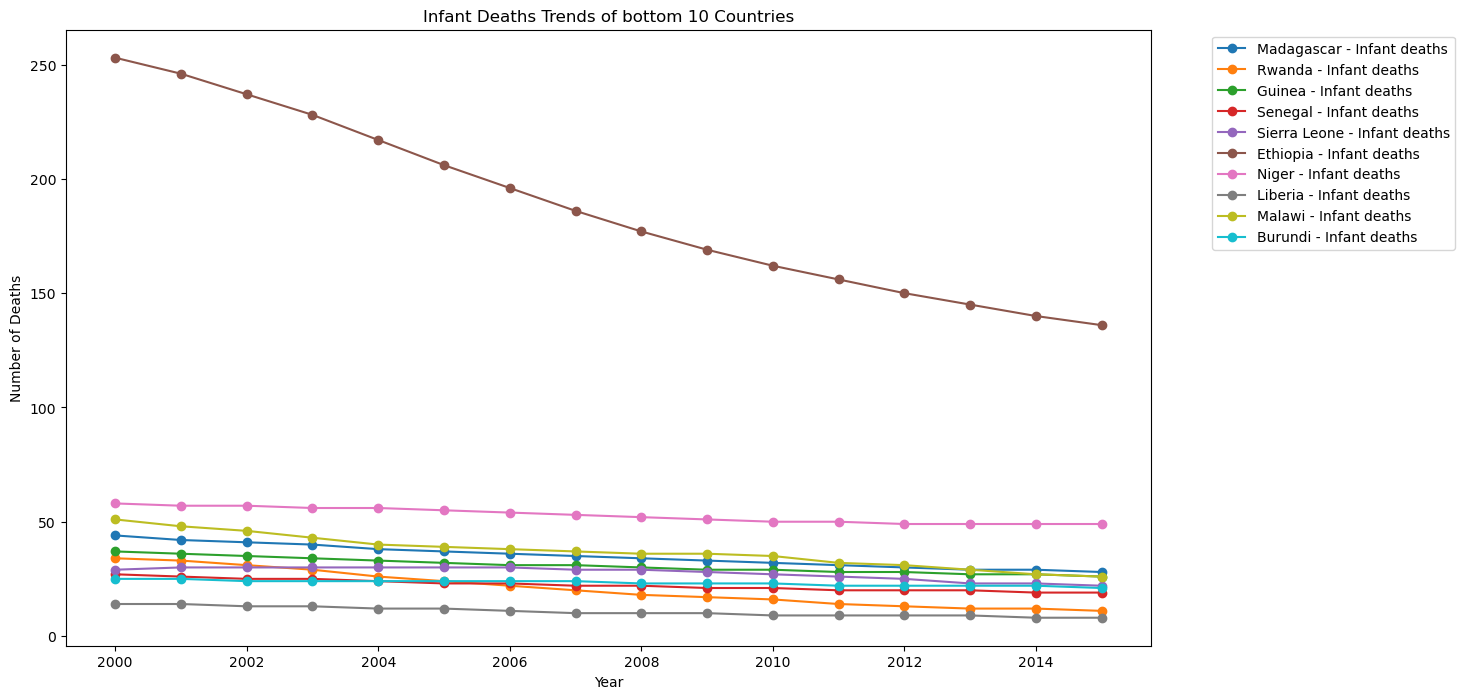

In [68]:
# 하위 10개국
fig = plt.figure(figsize=(14, 8))
fig.subplots()

bottom10_List = []
for country in bottom10:
    bottom10_List.append(bottom10_df_filled.loc[country])
bottom10_List

for i in range(len(bottom10)):
    plt.plot(bottom10_List[i]['Year'], bottom10_List[i]['infant deaths'], marker='o', label=f"{bottom10[i]} - Infant deaths")

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Infant Deaths Trends of bottom 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 하위 10개국 >> '마다가스카르', '르완다', '기니', '세네갈', '시에라리온', '에티오피아', '니제르', '리베리아', '말라위', '부룬디'

#### 유아 사망률과 관련있다 판단한 칼럼 정보:  
- Year: 데이터 기록 연도  
- Life expectancy: 출생시 평균 기대수명  
- Infant deaths: 인구 1000명당 영아 사망 수  
- Percentage expenditure: GDP 대비 보건 지출 비율  
- Hepatitis B: 1세 어린이 중 B형 간염 예방접종률 (%)  
- Under-five deaths: 인구 1000명당 5세 미만 사망 수  
- Polio: 1세 어린이 중 소아마비 예방접종률 (%)  
- Total expenditure: 정부의 총 예산 중 보건 지출 비율 (%)  
- HIV/AIDS: 0-4세 사이 HIV/AIDS 사망률 (1000명당 생명) - 면역 결핍증
- GDP: 국내 총생산  
- Population: 국가 인구  
- Schooling: 교육 연수  

In [69]:
# 상위 10개국 'Infant deaths'와 다른 변수들 간의 상관관계 계산
top_10_infant_corr = top10_df_filled.corr()['infant deaths']
print("Top 10 Countries 'Infant deaths' Correlation:")

# 하위 10개국 'Infant deaths'와 다른 변수들 간의 상관관계 계산
bottom_10_infant_corr = bottom10_df_filled.corr()['infant deaths']
print("\nBottom 10 Countries 'Infant deaths' Correlation:")

Top 10 Countries 'Infant deaths' Correlation:

Bottom 10 Countries 'Infant deaths' Correlation:


In [70]:
top_10_infant_corr

Year                      0.050098
Life expectancy           0.008425
infant deaths             1.000000
percentage expenditure   -0.084716
Hepatitis B              -0.341007
under-five deaths         0.858465
Polio                     0.020607
Total expenditure         0.171658
HIV/AIDS                       NaN
GDP                      -0.033666
Population                0.218725
Schooling                 0.476942
Name: infant deaths, dtype: float64

In [71]:
bottom_10_infant_corr

Year                     -0.141740
Life expectancy           0.006803
infant deaths             1.000000
percentage expenditure    0.045501
Hepatitis B              -0.198190
under-five deaths         0.993900
Polio                    -0.280895
Total expenditure        -0.165056
HIV/AIDS                  0.032228
GDP                      -0.059789
Population                0.604431
Schooling                -0.345028
Name: infant deaths, dtype: float64